# SAM [file format](https://www.metagenomics.wiki/tools/samtools/bam-sam-file-format) and [tags](https://www.samformat.info/sam-format-alignment-tags)
#### Index --- Value

0. Read Name
1. SAM flag --> decode
2. contig name or * for unmapped
3. mapped position of base 1 of a read on the reference sequence
4. MAPQ mapping quality
5. CIGAR string describing insertions and deletions
6. Name of mate
7. Position of mate
8. Template length
9. Read Sequence
10. Read Quality
11. NM - Edit distance to the reference (int)
12. ms - 
13. AS - Alignment score generated by aligner
14. nn - 
15. tp -
16. cm - Edit distance between the color sequence and the color reference
17. s1 - 
18. s2 - 
19. de -
20. SA - **Not in all lines** - Other canonical alignments in a chimeric alignment, formatted as a semicolon-delimited list: (rname, pos, strand, CIGAR, mapQ, NM;)+. Each element in the list represents a part of the chimeric alignment. Conventionally, at a supplementary line, the first element points to the primary line.
22. rl -
24. mv - Move table array, example mv:array('b', [5, 1, 1, .... 1, 0, 1])
25. qs -
26. mx -
27. ch -
28. rn -
29. st -
30. f5 - fast5 file name
31. ns -
32. ts -
33. RG - Read group. Value matches the header RG-ID tag if @RG is present in the header.


### sam informations [cigar/qual](https://genome.sph.umich.edu/wiki/SAM)

In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sam_exapmle="/v/projects/nanopore/balazs/data/thymine_0421/mapped_bam_runid_db4f2d165a2cb95d870762f8bd1749edb5a64d5d_0_0.sam"

In [3]:
with open(sam_exapmle, 'r') as file:
    sam_files = file.read().split('\n')
    sam_files = [line for line in sam_files if not line.startswith('@')]

In [4]:
len(sam_files[0].split('\t'))

31

In [5]:
read = sam_files[0].split('\t')

for index, item, in enumerate(read):
    max_idx = 40
    append_dots = ' ...' if len(item) > max_idx else ''
    print(f'{index}. --- {item[:max_idx]+append_dots}')


0. --- 00a040a3-847b-4397-bf7e-cbb8fc77fa97
1. --- 0
2. --- p300_ID3
3. --- 4
4. --- 60
5. --- 28S48M1D88M1I60M2D5M1I5M3D8M1I5M1I67M2I7 ...
6. --- *
7. --- 0
8. --- 0
9. --- ATATTACTTCGTTCAGTTGTGTGCTCATATGCTACCAAAT ...
10. --- '(()''(,,733345466('&+((,-4555<:;:<=<>=B ...
11. --- NM:i:61
12. --- ms:i:1974
13. --- AS:i:1964
14. --- nn:i:0
15. --- tp:A:P
16. --- cm:i:128
17. --- s1:i:883
18. --- s2:i:0
19. --- de:f:0.0428
20. --- rl:i:0
21. --- mv:array('b', [5, 1, 1, 0, 0, 0, 0, 1, 0 ...
22. --- qs:13
23. --- mx:1
24. --- ch:6
25. --- rn:502898
26. --- st:2023-04-22T01:21:06Z
27. --- f5:aoa546_pass_235c7b69_db4f2d16_18.fast ...
28. --- ns:12897
29. --- ts:125
30. --- RG:db4f2d165a2cb95d870762f8bd1749edb5a64 ...


In [6]:
with open(sorted(glob("/v/projects/nanopore/balazs/data/thymine_0421/*0.sam"))[0], 'r') as file:
    sam_files = file.read().split('\n')[:-1] # [:-1], because the last element is ''
    sam_files = [line for line in sam_files if not line.startswith('@')]

In [7]:
data=[]
length=[]
for s in sam_files:
    data.append(s.split('\t'))
    length.append(len(s.split('\t')))
    
data = np.array(data, dtype='object')
length = np.array(length)

In [8]:
np.unique(length )

array([22, 30, 31, 32])

In [9]:
l=32
data[length == l].shape, data[length == l][0]

((73,),
 ['1ef274fa-dcfe-4cd6-9765-09d459601c0a',
  '0',
  'p300_ID3',
  '4',
  '60',
  '33S131M1D8M1D52M2D3M2D17M1I27M3I48M2D31M2I6M2I56M2I3M2I37M1I36M1I21M1D46M1I22M1D31M1I3M1I21M1D3M1D55M1D5M1D34M3D38M3I11M3D13M1I26M1I3M2I79M1I74M1D7M1D18M1I30M815S',
  '*',
  '0',
  '0',
  'AACATGTACTTCGTTCAGTTACGTATTGCTCATATGCTACCAAATGCTGCAGGCATGGTTCCAGTTTCCATGAATCCAGGGCCTAACATGGGACAGCCGCAACCAGGAATGACTTCTAATGGCCCTCTACCTGACCCAAGTATGATCCGTGGCAGTGTGCCAAACAGATGATACTCGAATAACTCCACAATCTGGTTTGAATCAATTTGGCCAGATGAGCATAGTAGCCCTATTGTACCCCGGCGAGCCCCCTCCTCTTCAGCACCATGGACAGGAGTTGGCTCAACCTGGAGCTCTCAACCCGCCTATGGGCTATGGGCCTCATGCAACAACCTTCCAACCAGGGCCAGGTCCAGCACCTCAGAGACTCAGTTCCCATCACAGGGAATGAATGTAACAAATATCCCTTTGGCTCCGTCCAAAGCAGGGTCAAGCTCCAGTGTCTCAAGCACAAATGTCTAGTTCCTTCCTGCCCGGTGAACTCTCCTATAATGCCTCCAGAGGTCTCAGGGGAGCCACATTCCTGTCCCCAGCTTCCTCAACCAGCTCTTCATCAGAATTCACCCTCGCCCTGTACCTAGTCATGCCCCCACCCTCACCATACTCCCCCAAGCATAGGGGCTCCAGCCAGCCACCAGCAACAACAATTCAGCCCTGTTCCTACACCTCCTGCCATGCCACCTGGGCCACAGTCCCAGGCTCACCATCCCCTCAAGGCAGAC

----
# Phred scale: (see [here](https://samtools.github.io/hts-specs/SAMv1.pdf) on p3.)
Given a probability $0 < p ≤ 1$, the phred scale of
$$Phred =  \left\lfloor −10 \cdot \log_{10} (p) \right\rceil $$

In [12]:
p = np.linspace(1e-6,1, 100000)
phred = np.round(-10*np.log10(p))

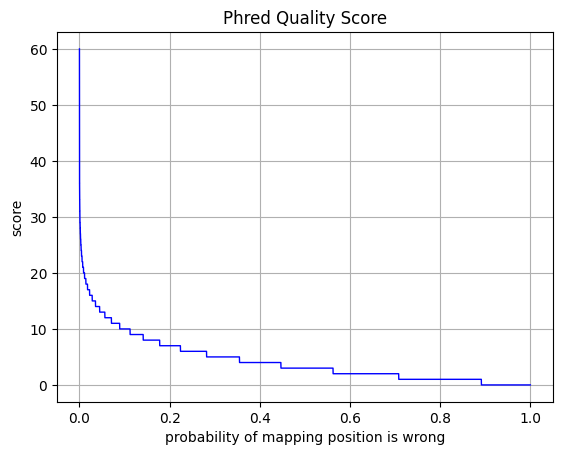

In [14]:
plt.plot(p, phred, '-', ms=1, lw=1, c='b')
plt.title('Phred Quality Score')
plt.xlabel('probability of mapping position is wrong')
plt.ylabel('score')
plt.grid()
plt.savefig('figures/phred_score.pdf', bbox_inches='tight')